In [154]:
import bmxobs
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from scipy.ndimage import gaussian_filter1d
from numpy.fft import rfft

In [2]:
da=bmxobs.BMXObs("pas/201021_2000",channels='440,441')


In [6]:
l=len(da.data[440])//32*32
d=np.copy(da.data[440])[:l,:]
t1=da.temp['fgpa'][:l,1]
t2=da.temp['adc'][:l,1]
t3=da.temp['frontend'][:l,1]

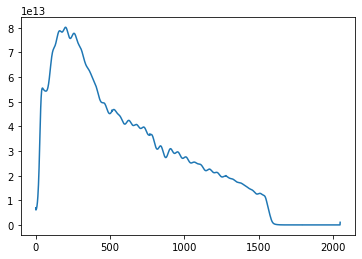

In [35]:
ms=d.mean(axis=0)
plt.plot(ms)

In [67]:
dn = d[:,10:1500]/ms[None,10:1500]
C=np.cov(dn,rowvar=False)+1.0
#C=np.zeros((dn.shape[1],dn.shape[1]))
#for x in dn:
#    C+=np.outer(x,x)
#C/=dn.shape[0]

In [68]:
eigval, eigvec = la.eig(C)

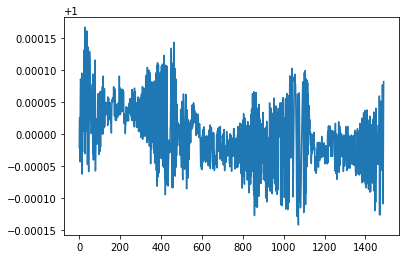

In [69]:
plt.plot(dn.mean(axis=0))

[]

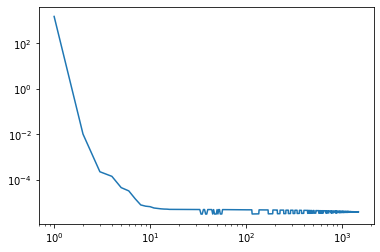

In [70]:
plt.plot(range(1,dn.shape[1]+1),eigval)
plt.loglog()
#plt.ylim(1e22,1e27)

In [143]:
we = [(dn*eigvec[:,i][None,:]).sum(axis=1) for i in range(20)]

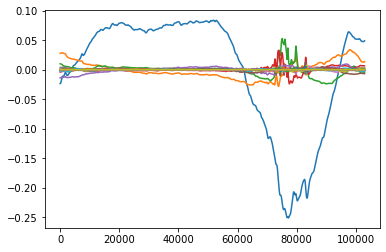

In [144]:
for i in range(1,20):
    plt.plot(gaussian_filter1d(we[i],128),label=str(i))

In [145]:
def predict(nmodes):
    pred = np.outer(we[0],eigvec[:,0])
    for i in range(1,nmodes):
        pred+=np.outer(we[i],eigvec[:,i])
    return pred

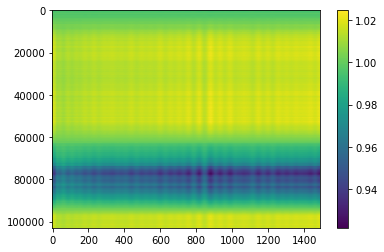

In [147]:
plt.imshow(predict(2), aspect='auto')
plt.colorbar()


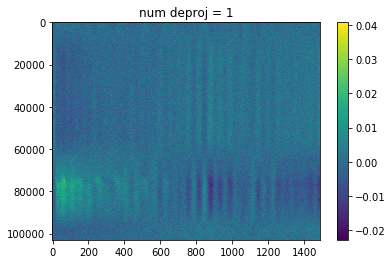

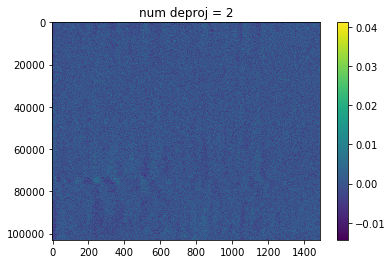

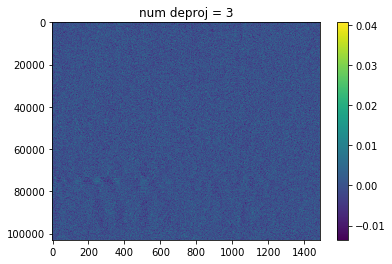

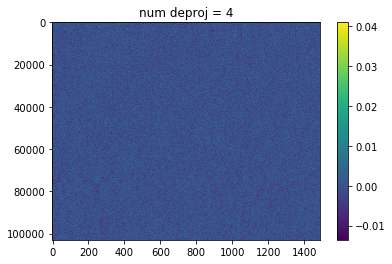

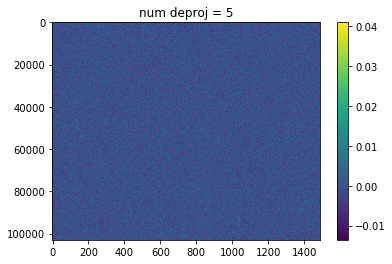

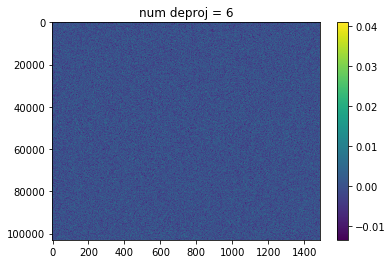

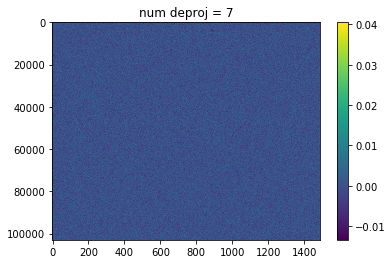

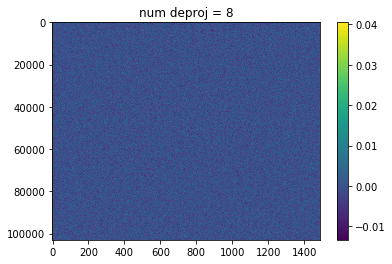

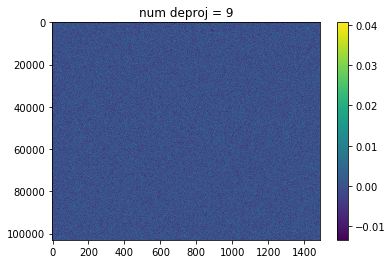

In [155]:
ps=[]
for i in range(1,10):
    res = dn-predict(i)
    plt.figure()
    plt.title("num deproj = %i"%i)
    plt.imshow(res,aspect='auto')
    plt.colorbar()
    xx = np.array([abs(rfft(xx)**2) for xx in res.T]).mean(axis=0)
    ps.append(xx)

[]

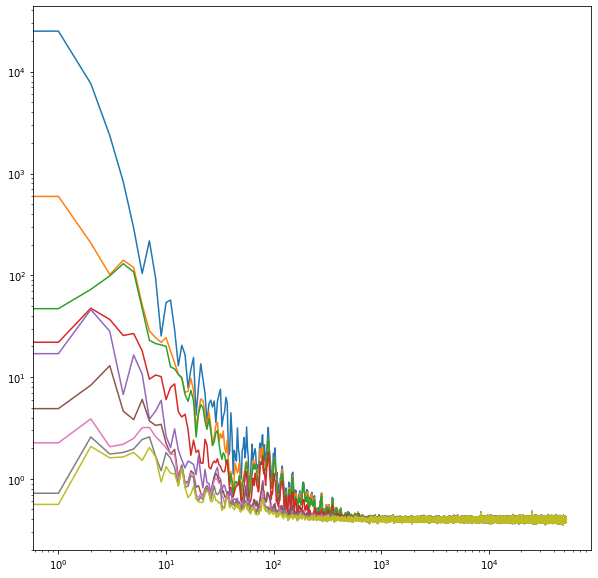

In [160]:
plt.figure(figsize=(10,10))
for i,p in enumerate(ps):
    plt.plot(p)
plt.loglog()

(0.5, 4)

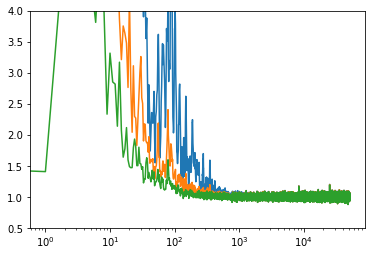

In [190]:
plt.plot(ps[2]/ps[8][1000:].mean())
plt.plot(ps[4]/ps[8][1000:].mean())
plt.plot(ps[8]/ps[8][1000:].mean())
plt.semilogx()
plt.ylim(0.5,4)


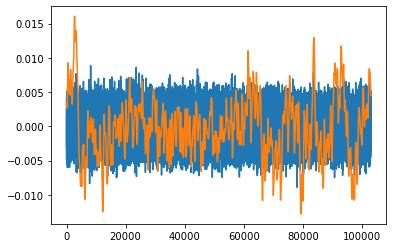

In [191]:
plt.plot(res[:,1200])
plt.plot(gaussian_filter1d(res[:,1200],128)*30)

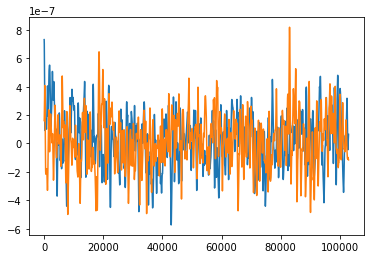

In [203]:
res = dn-predict(6)
plt.plot(gaussian_filter1d(res[:,1201]*res[:,1200],128))
plt.plot(gaussian_filter1d(res[:,300]*res[:,301],128))

[]

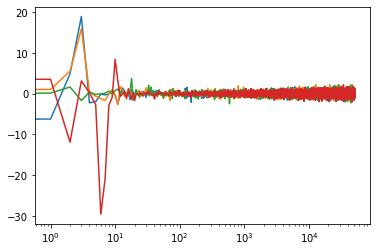

In [212]:
plt.plot(rfft(res[:,300])*rfft(res[:,301]))
plt.plot(rfft(res[:,500])*rfft(res[:,501]))
plt.plot(rfft(res[:,700])*rfft(res[:,701]))
plt.plot(rfft(res[:,1200])*rfft(res[:,1201]))
plt.semilogx()